                                     EDA  AND OBSERVATION                                   


1.Dataset view
2.Different Features views
3.Data Distribution 
4.Feature cordinality View

1. Importing required liberies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

1.1 Importing Datasets as Dataframe 

In [3]:
df=pd.read_csv("stud.csv") 

1.2 Checking 10 records


In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


1.3 Checking info about records

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB



1.4 Statistical view of Dataset

In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


total number of columns

In [6]:

df.columns.value_counts().sum()
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


1.5 checking datatypes of diffrent features

In [7]:
df.dtypes.reset_index()

,index,0
0,gender,object
1,race/ethnicity,object
2,parental level of education,object
3,lunch,object
4,test preparation course,object
5,math score,int64
6,reading score,int64
7,writing score,int64


Observation: There are 5 objects dtypes and 3 num dtypes


1.6 Checking if Null Value Exits

In [8]:
df.isnull().sum().reset_index()

,index,0
0,gender,0
1,race/ethnicity,0
2,parental level of education,0
3,lunch,0
4,test preparation course,0
5,math score,0
6,reading score,0
7,writing score,0


Observation: There are 0 Null Values


1.7Checking duplicates 

In [9]:
df.duplicated().sum()

np.int64(0)

Results:There are 0 duplicates records in df

2.0 Checking numbers of different uniqueue value in each columns

In [10]:
df.nunique().reset_index().rename(columns={0:"counts"})

,index,counts
0,gender,2
1,race/ethnicity,5
2,parental level of education,6
3,lunch,2
4,test preparation course,2
5,math score,81
6,reading score,72
7,writing score,77


Results: The object features have less uniqueue number of categoryies


2.1 Exploring the categorical feature and understanding the ordinality if exists

In [11]:
print("gender =",df['gender'].unique())
print("race and ethnicity =",df['race/ethnicity'].unique())
print("parenetal education level =",df["parental level of education"].unique())
print("lunch =",df["lunch"].unique())
print("tech prepartion =",df["test preparation course"].unique())


gender = ['female' 'male']
race and ethnicity = ['group B' 'group C' 'group A' 'group D' 'group E']
parenetal education level = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch = ['standard' 'free/reduced']
tech prepartion = ['none' 'completed']


2.2 Defining numeric and catgeorical features

In [12]:
numeric_features=[feature for feature in df.columns if df[feature].dtype != 'O']
catgorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print('we have {} numerical features{}'.format(len(numeric_features),numeric_features))
print('we have {} catgorical features{}'.format(len(catgorical_features),catgorical_features))

we have 3 numerical features['math score', 'reading score', 'writing score']
we have 5 catgorical features['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


2.3 Adding two features total score and average score

In [5]:
df.columns
df["Total_score"]=df["math score"]+df['reading score']+df['writing score']
df['Average_score']=df["Total_score"]/3

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


2.4 Student in maths got less than average score

In [15]:
(df[df['math score']<=df['math score'].mean()]).groupby(df["math score"]).size().reset_index().head(10)


,math score,0
0,0,1
1,8,1
2,18,1
3,19,1
4,22,1
5,23,1
6,24,1
7,26,1
8,27,2
9,28,1


3.0 Exploring Various features reasons where,students belonging to average score less than 40%

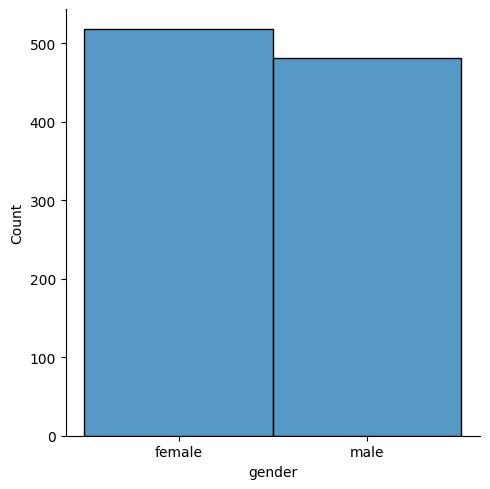

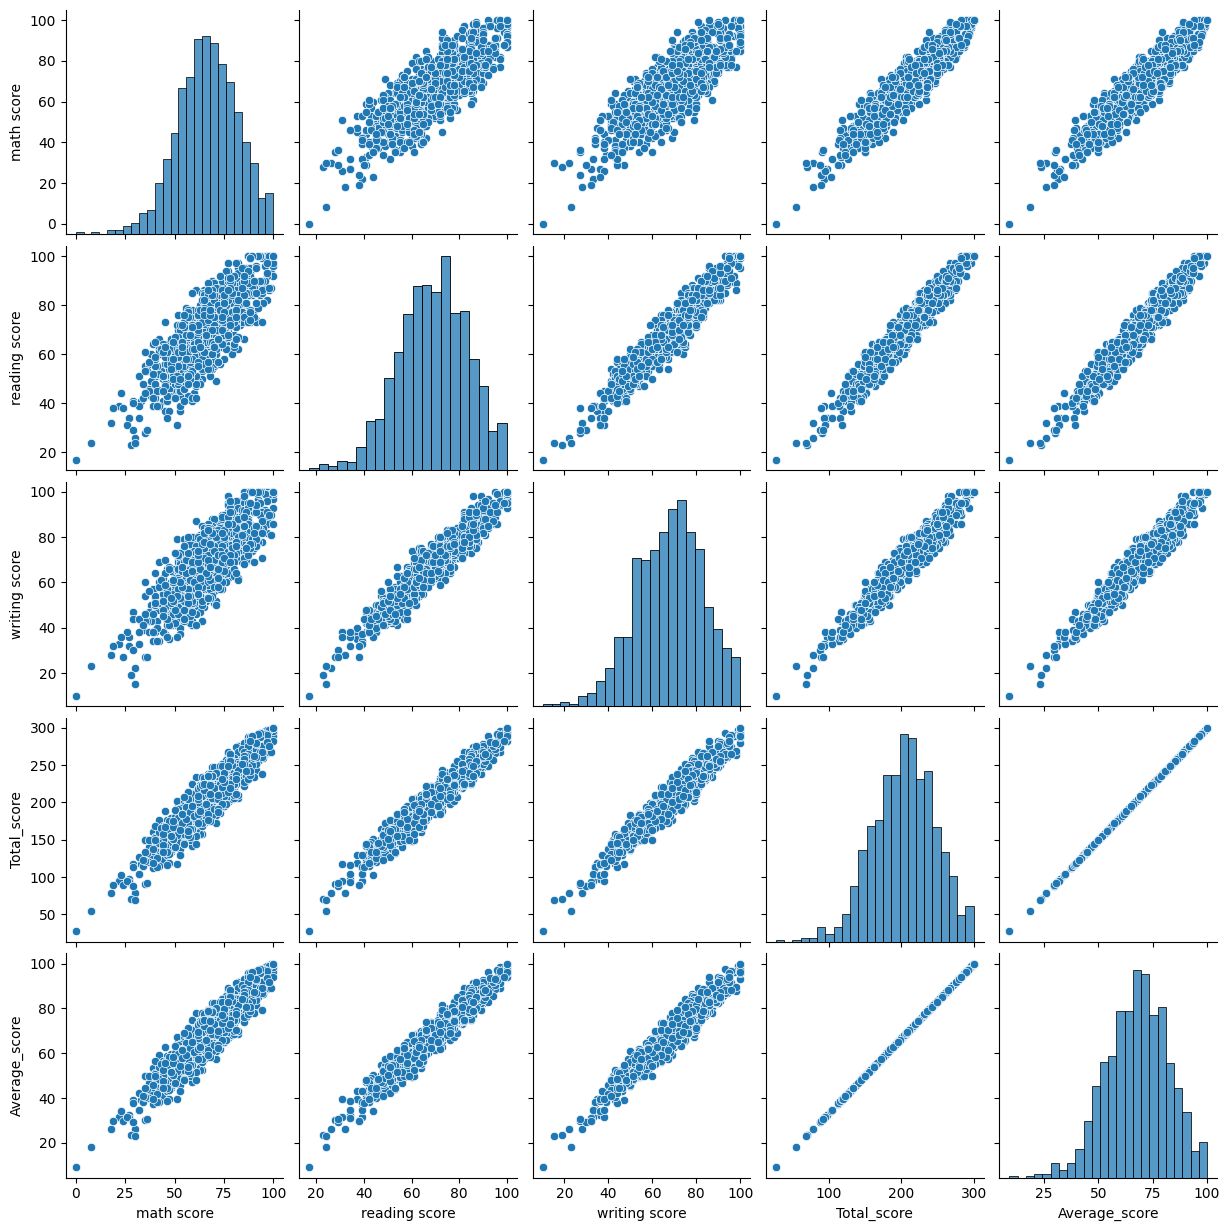

In [31]:
sns.displot(x='gender',data=df)
sns.pairplot(df)

3.1 Average score Distribution


<Axes: ylabel='Average_score'>

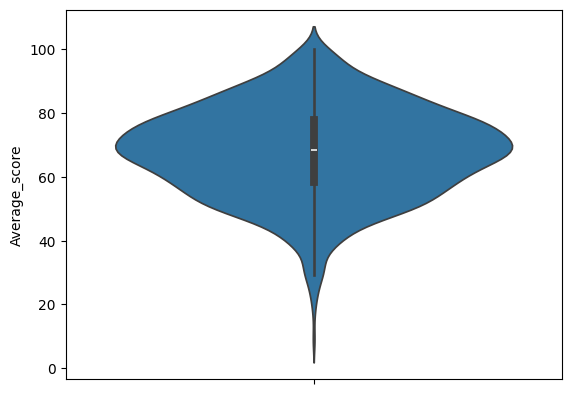

In [33]:

sns.violinplot(y='Average_score',data=df)

3.2 Race and Ethnicity view with parental level of higer education	

<Axes: xlabel='race/ethnicity', ylabel='count'>

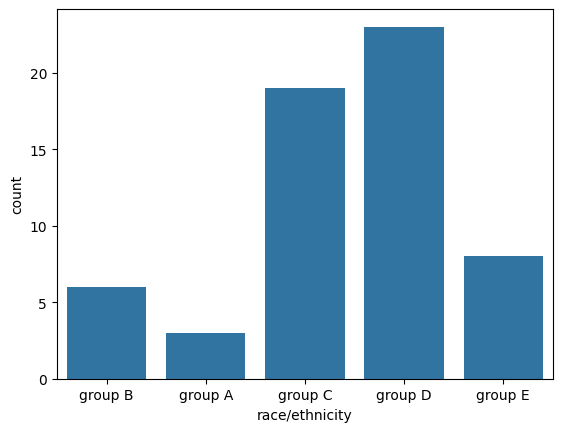

In [36]:
data_1=df.loc[df[df["parental level of education"]=="master's degree"].index,["parental level of education","race/ethnicity"]].reset_index()
sns.countplot(x='race/ethnicity',data=data_1)

Results: Group C&D parent are more qualified 

3.3 parental level of education	of data distribution view

<Axes: xlabel='Average_score'>

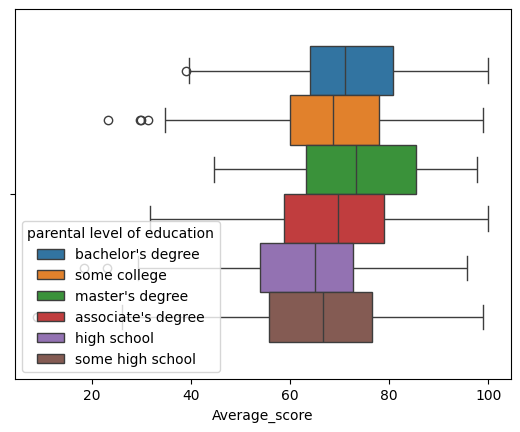

In [19]:
sns.boxplot(x='Average_score',hue="parental level of education",data=df)

3.4 Average score view with test preparation view

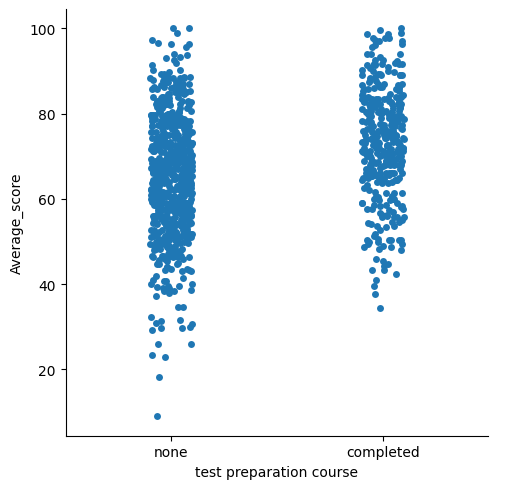

In [20]:
sns.catplot(y='Average_score',x='test preparation course',data=df)

In [46]:
df.loc[df[(df["lunch"]=="standard")&(df['Average_score']<40)].index,["Average_score","lunch"]]

,Average_score,lunch
76,26.000000,standard
331,39.666667,standard
601,29.333333,standard
706,38.666667,standard
787,29.666667,standard
810,39.333333,standard


<Axes: xlabel='lunch', ylabel='Average_score'>

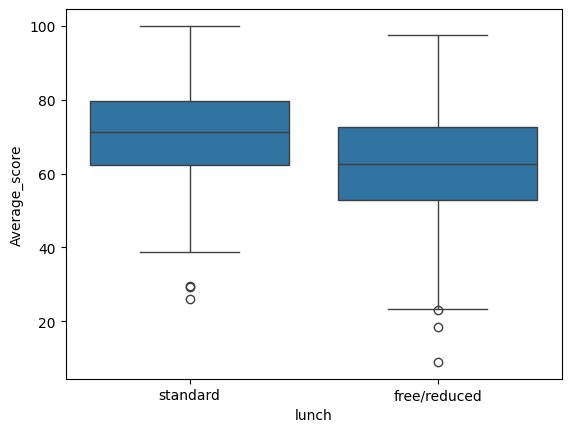

In [21]:
sns.boxplot(x='lunch',y='Average_score',data=df)


3.5 Does the Average score depends on gender?

<Axes: xlabel='Average_score', ylabel='Count'>

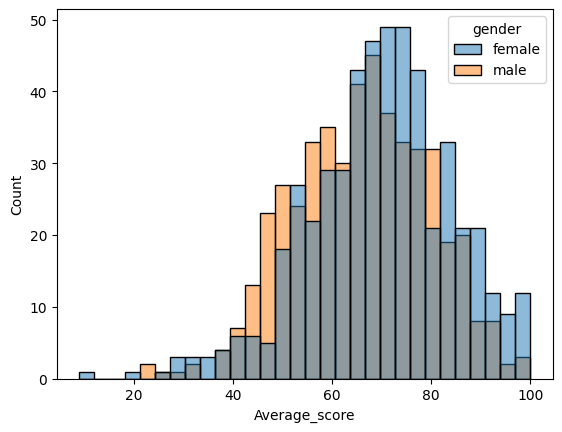

In [22]:
sns.histplot(x='Average_score',hue='gender',data=df,bins=30)

Results: Gender is not likely bias term to influence the average score.

4.0 Lets Divide the dataset into 4 classes less than 0 to 40%,40% to 70% ,70% to 90%,greater than 90%

In [23]:
less_40_=(df.loc[df[df["Average_score"]<40].index,['gender','Average_score','race/ethnicity','lunch','test preparation course','parental level of education']]).reset_index().drop('index',axis=1)
(df.loc[df[df["Average_score"]<40].index,['gender','Average_score','race/ethnicity','lunch','test preparation course','parental level of education']]).reset_index().drop('index',axis=1).head(5)
print('less than 40% =',len(less_40_),"students")

less than 40% = 30 students


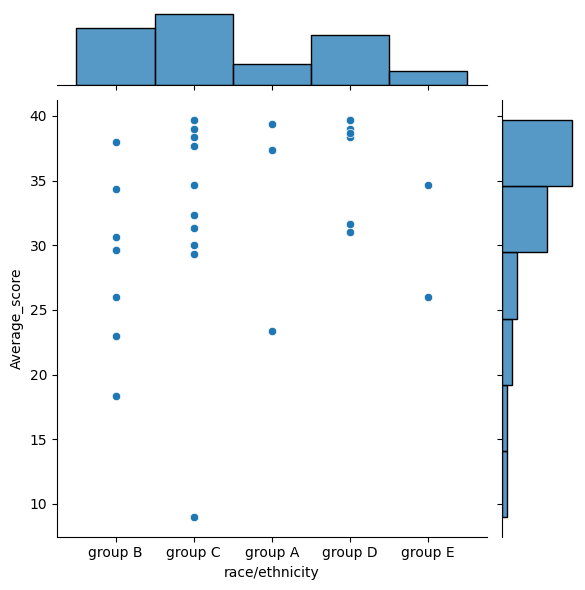

In [50]:

sns.jointplot(x="race/ethnicity",y='Average_score',data=less_40_)

4.1

In [25]:
_40_to_65=(df.loc[df[(df["Average_score"]>40)&(df["Average_score"]<=65)].index,['gender','Average_score','race/ethnicity','lunch','test preparation course','parental level of education']]).reset_index().drop('index',axis=1)
len((df.loc[df[(df["Average_score"]>40)&(df["Average_score"]<=65)].index,['gender','Average_score','race/ethnicity','lunch','test preparation course','parental level of education']]).reset_index().drop('index',axis=1))


376

<Axes: xlabel='race/ethnicity', ylabel='Count'>

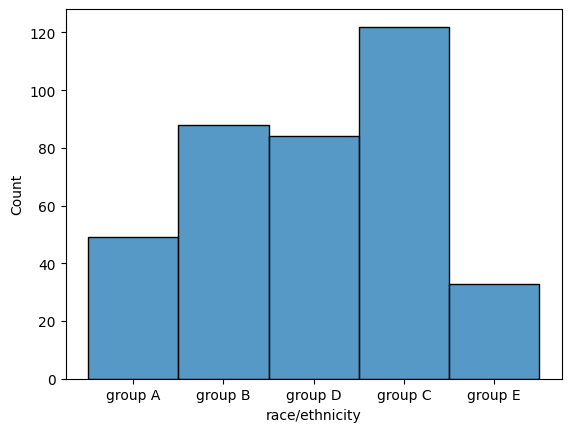

In [26]:
sns.histplot(x='race/ethnicity',data=_40_to_65,bins=20)

4.2

In [27]:
_65_to_85=(df.loc[df[(df["Average_score"]>65)&(df["Average_score"]<=85)].index,['gender','Average_score','race/ethnicity','lunch','test preparation course','parental level of education']]).reset_index().drop('index',axis=1)
len((df.loc[df[(df["Average_score"]>65)&(df["Average_score"]<=85)].index,['gender','Average_score','race/ethnicity','lunch','test preparation course','parental level of education']]).reset_index().drop('index',axis=1))


480

<Axes: xlabel='race/ethnicity', ylabel='Count'>

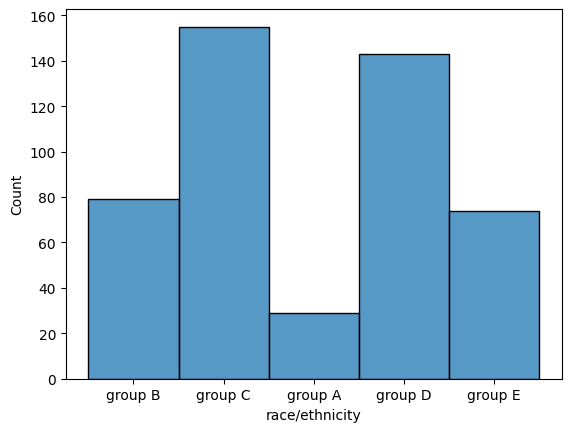

In [28]:
sns.histplot(x='race/ethnicity',data=_65_to_85)

4.3

In [29]:
_85_to=(df.loc[df[(df["Average_score"]>85)].index,['gender','Average_score','race/ethnicity','lunch','test preparation course','parental level of education']]).reset_index().drop('index',axis=1)
len((df.loc[df[(df["Average_score"]>85)].index,['gender','Average_score','race/ethnicity','lunch','test preparation course','parental level of education']]).reset_index().drop('index',axis=1))


112

4.4

<Axes: xlabel='Average_score', ylabel='Count'>

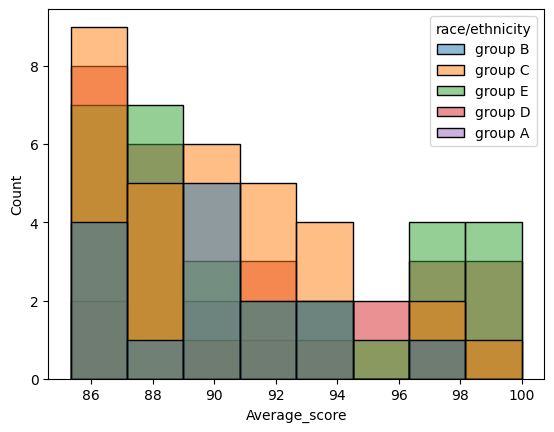

In [35]:
sns.histplot(hue='race/ethnicity',x='Average_score',data=_85_to)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Total_score', 'Average_score'],
      dtype='object')

Overall observaton :
1.From race/ethnicity says that groups C,E,D perform overall better thann Group A&B from 65 sample distrubtion 

2.Students who are completed the test preparations are most likely to score not less than 50

3.Parental qualification with master,bachelor,some college degree. of students are more likely cross 40% in exam mor easily. above with 65% sampling test score prove it.
3.1 Parent with qualification of master degree are most likey to score more 75%percentile 

4.Students with Standard luch show that ability to score more than 60% are likely to happen easily ,with 80 sampling test show that
4.1 Student with free/reduced lunch are less potentially to score less than 60%, with 60 % distibution show that



Conclusion:Student who complted the the test preparation,and had standard luch ,and parental qualification is either bachlor or master degree ,are most likely to get good marks more easily than other,60%sample datasets proves it
1. 99% dataset from test prepartion has postive results when test preparation is complted
2. 99% dataset from meal has postive results when student had a standard meal
4. 55% datasets from parental ,when they had bachlor or master degree ,impact on the student performance